# Análisis de Cupído FJ25 con SKLearn

In [47]:
import pandas as pd

df = pd.read_excel("Cupido FJ25 (Respuestas).xlsx")

In [48]:
df.head()

,Marca temporal,Atención,Higiene,Amabilidad,Atractiva(o),Buen humor,Situación sentimental,Afinidad de mentalidad,Desenlace
0,2025-04-01 16:33:48.682,5,5,5,5,3,NaN,4,Éxito
1,2025-04-01 16:34:28.016,4,5,4,3,2,NaN,2,Fallo
2,2025-04-01 16:34:37.660,5,5,5,5,5,NaN,5,Éxito
3,2025-04-01 16:34:52.792,5,5,5,1,5,NaN,5,Éxito
4,2025-04-01 16:34:54.194,2,3,3,2,4,NaN,1,Fallo


In [49]:
df["Desenlace"].value_counts()

Desenlace
Fallo    24
Éxito    19
Name: count, dtype: int64

Como se relacionan ambas variables (mentalidad y desenlace)


In [50]:
pd.crosstab(df["Afinidad de mentalidad"], df["Desenlace"], margins=True)

Desenlace,Fallo,Éxito,All
Afinidad de mentalidad,,,
1,7,0,7
2,7,0,7
3,8,3,11
4,0,6,6
5,2,10,12
All,24,19,43


In [51]:
pd.crosstab(df["Higiene"], df["Desenlace"], margins=True)

Desenlace,Fallo,Éxito,All
Higiene,,,
1,1,0,1
2,1,0,1
3,2,1,3
4,6,1,7
5,14,17,31
All,24,19,43


In [52]:
# si separamos segun la variable afinidad de mentalidad
df[(df["Afinidad de mentalidad"] > 3) & (df["Atractiva(o)"] > 3)].groupby("Desenlace")[
    "Atractiva(o)"
].count()

Desenlace
Fallo     1
Éxito    14
Name: Atractiva(o), dtype: int64

In [53]:
def gini(x_n):
    d = sum(x_n)
    return 1 - sum((x / d) ** 2 for x in x_n)

Mayor impureza


In [54]:
gini([50, 50, 50])

0.6666666666666667

In [55]:
gini([0, 50, 50])

0.5

Poca impureza


In [56]:
gini([0, 49, 5])

0.16803840877914955

<Axes: title={'center': 'Atractiva(o) vs Desenlace'}, xlabel='Desenlace'>

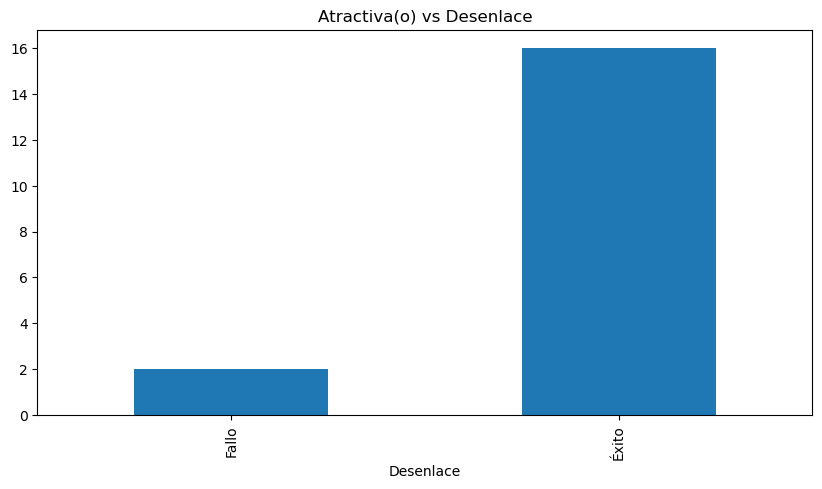

In [57]:
df[(df["Afinidad de mentalidad"] > 3)].groupby("Desenlace")[
    "Atractiva(o)"
].count().plot(kind="bar", title="Atractiva(o) vs Desenlace", figsize=(10, 5))

Si afinidad mental es mayor a 3


In [58]:
gini([2, 16])

0.19753086419753085

## Implementación de árboles de decisión con Sklearn

Esta implementación utiliza el algoritmo CART (Classification and Regression Trees) para construir un árbol de decisión. El algoritmo CART utiliza la impureza de Gini como criterio para dividir los nodos del árbol. La impureza de Gini mide la pureza de un nodo, donde un valor de 0 indica que todos los ejemplos en el nodo pertenecen a la misma clase y un valor de 0.5 indica que los ejemplos están distribuidos uniformemente entre las clases.


In [59]:
from sklearn.model_selection import train_test_split  # para la separacion de los datos
from sklearn.tree import DecisionTreeClassifier  # para el arbol de decision
from sklearn.metrics import accuracy_score  # proporcion de aciertos

# split
# X : caracteristicas (Atencion, Atractiva(o), Higiene, Afinidad de mentalidad)
# y : variable objetivo (Desenlace)

X = df.drop(["Desenlace", "Marca temporal", "Situación sentimental"], axis=1)
y = df["Desenlace"]

# Evaluar el arbol con el 100% de los datos
clf = DecisionTreeClassifier()
# Entrenar el modelo
clf.fit(X, y)
# Predecir
pred_y = clf.predict(X)
# Evaluar el modelo
acc = accuracy_score(y, pred_y)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.95


## Visualización del árbol de decisión

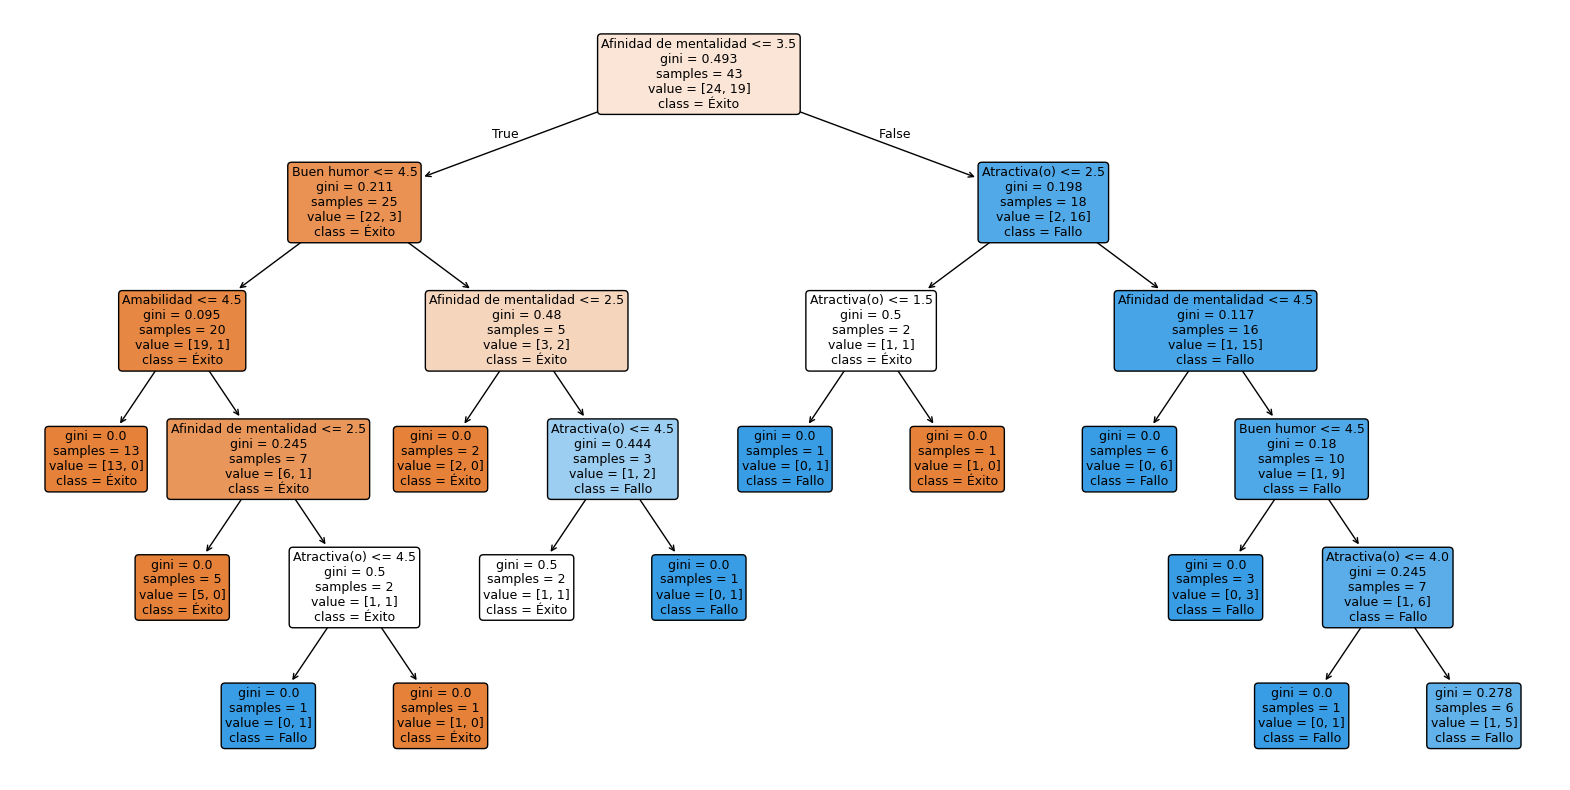

In [60]:
from sklearn.tree import plot_tree  # para graficar el arbol
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plot_tree(
    clf,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=y.unique(),
    fontsize=9,
)
plt.show()

## Importancia de las características
sklearn mide la importancia de las características utilizando la reducción de la impureza de Gini. La importancia de una característica se calcula como la suma ponderada de la reducción de la impureza de Gini en todos los nodos donde se utiliza esa característica para dividir el nodo. La importancia de cada característica se normaliza para que sume 1.0. Esto permite comparar la importancia relativa de cada característica en el modelo. Las características con mayor importancia son las que tienen un mayor impacto en la predicción del modelo.

In [61]:
clf.feature_importances_

array([0.        , 0.        , 0.01001553, 0.16510641, 0.05747372,
       0.76740434])

In [62]:
for fi, c in zip(clf.feature_importances_, X.columns):
    print(round(fi, 3),' ',c)

0.0   Atención
0.0   Higiene
0.01   Amabilidad
0.165   Atractiva(o)
0.057   Buen humor
0.767   Afinidad de mentalidad
